<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [1]:
#importera paket och exempeldata 
import os
import numpy as np
import pandas as pd
import scipy.stats as scs 

import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels.api as sm
from statsmodels.formula.api import ols

# importera palmer penguins
file_path = os.path.realpath('../assets/penguins.csv')
penguins = pd.read_csv(file_path)
penguins = penguins.dropna().reset_index() # Plocka bort rader som innehåller NaN

In [2]:
penguins = penguins.sample(30)
penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
297,308,Chinstrap,Dream,42.5,16.7,187.0,3350.0,female,2008
118,124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,female,2009
85,91,Adelie,Dream,41.1,18.1,205.0,4300.0,male,2008
54,60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,female,2008
35,40,Adelie,Dream,36.5,18.0,182.0,3150.0,female,2007


<h3>Korrelationstest med scipy.stats</h3>

In [3]:
r, p = scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
r, p

(0.8557695888943506, 1.6715169630562381e-09)

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [4]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     76.61
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.67e-09
Time:                        20:54:33   Log-Likelihood:                -104.01
No. Observations:                  30   AIC:                             212.0
Df Residuals:                      28   BIC:                             214.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     133.7909      7.911     16.913      

<h3>Prediktionsintervall in sample-prediktion</h3>

In [5]:
predictions = model.get_prediction(penguins['body_mass_g'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,169.908832,204.043021
1,164.884513,199.541666
2,185.349013,218.767478
3,166.566854,201.034550
4,166.566854,201.034550
5,191.628836,225.188554
6,189.289324,222.765228
7,200.805610,235.063129
8,180.552542,214.038273
9,188.505384,221.961556


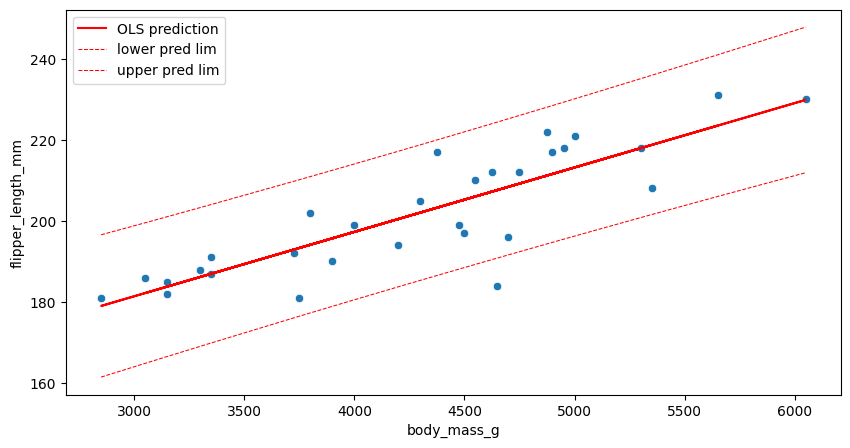

In [6]:
order = np.argsort(penguins['body_mass_g'])
xs = np.array(penguins['body_mass_g'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

order = np.argsort(penguins['body_mass_g'])
x = np.array(penguins['body_mass_g'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

      body_mass_g
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


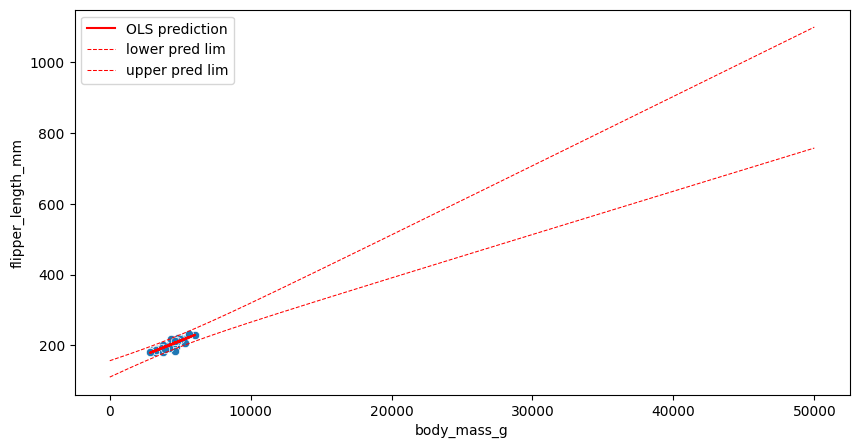

In [7]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['body_mass_g'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()